In [8]:
#Import Data

import pandas as pd
import matplotlib.pyplot as plt
import math

econ_freedom = pd.read_csv("economic_freedom_index2019_data.csv",encoding='latin-1', index_col = "Country")
gender_development = pd.read_csv("gender_development.csv",index_col = "Country")
gender_inequality = pd.read_csv("gender_inequality.csv",index_col = "Country")
historical_index = pd.read_csv("historical_index.csv",index_col = "Country")
human_development = pd.read_csv("human_development.csv",index_col = "Country")
inequality = pd.read_csv("inequality_adjusted.csv",index_col = "Country")
poverty = pd.read_csv("multidimensional_poverty.csv",index_col = "Country")


In [9]:
#Reconcile country names 

def UpdateCountry(df, old, new):
    df.loc[new] = historical_index.loc[old].values
    df = df.drop(old)
    return df

historical_index = UpdateCountry(historical_index,"Hong Kong, China (SAR)","Hong Kong SAR")
historical_index = UpdateCountry(historical_index,"Viet Nam","Vietnam")
historical_index = UpdateCountry(historical_index,"Congo","Congo, Democratic Republic of the Congo")
historical_index = UpdateCountry(historical_index,"Kyrgyzstan","Kyrgyz Republic")
historical_index = UpdateCountry(historical_index,"Lao People's Democratic Republic","Lao P.D.R.")
historical_index = UpdateCountry(historical_index,"Moldova (Republic of)","Moldova")
historical_index = UpdateCountry(historical_index,"Russian Federation","Russia")
historical_index = UpdateCountry(historical_index,"Slovakia","Slovak Republic")
historical_index = UpdateCountry(historical_index,"Tanzania (United Republic of)","Tanzania")
historical_index = UpdateCountry(historical_index,"Venezuela (Bolivarian Republic of)","Venezuela") 
historical_index = UpdateCountry(historical_index,"Bolivia (Plurinational State of)","Bolivia") 


In [10]:
#Column pre-processing

#shortening column names to make them more managable
historical_index = historical_index.rename(columns = {"Human Development Index (1990)":"1990","Human Development Index (2000)":"2000","Human Development Index (2010)":"2010",
                            "Human Development Index (2011)":"2011","Human Development Index (2012)":"2012","Human Development Index (2013)":"2013","Human Development Index (2014)":"2014"})
#updating column data types
for col in historical_index:
    historical_index[col] = historical_index[col].replace("..", 0)
    historical_index[col] = historical_index[col].astype(float)                                                                                                   

#cleaning up miscellaneous text 
econ_freedom["GDP (Billions, PPP)"] = econ_freedom["GDP (Billions, PPP)"].astype(str)
econ_freedom["GDP (Billions, PPP)"] = econ_freedom["GDP (Billions, PPP)"].str.replace('$','').str.replace(',','')
econ_freedom["GDP (Billions, PPP)"] = econ_freedom["GDP (Billions, PPP)"].str.replace("2015 est.","")
econ_freedom["GDP (Billions, PPP)"] = econ_freedom["GDP (Billions, PPP)"].str.replace("CHF.","")
econ_freedom["GDP (Billions, PPP)"] = econ_freedom["GDP (Billions, PPP)"].str.replace("(2014 )","")
econ_freedom["GDP (Billions, PPP)"] = econ_freedom["GDP (Billions, PPP)"].str.replace("(","")
econ_freedom["GDP (Billions, PPP)"] = econ_freedom["GDP (Billions, PPP)"].str.replace(")","")
econ_freedom["GDP (Billions, PPP)"] =  econ_freedom["GDP (Billions, PPP)"].astype(float)                                                                                                   
econ_freedom["FDI Inflow (Millions)"] = econ_freedom["FDI Inflow (Millions)"].str.replace(",","")
econ_freedom["FDI Inflow (Millions)"] =  econ_freedom["FDI Inflow (Millions)"].astype(float)                                                                                                   


In [11]:
#remove rows with missing required data
historical_index = historical_index[(historical_index["2014"] != 0) & (historical_index["1990"] != 0)]

#calculate percent change
historical_index["Percent_Change"] = (historical_index["2014"] - historical_index["1990"])/historical_index["1990"]  

In [13]:
#Join data sets
econ_vs_hdi = pd.merge(econ_freedom, historical_index, how='inner', on = "Country")


In [14]:
#Group countries by HDI Ranking into 7 groups

total_size = econ_vs_hdi["HDI Rank"].count()
split_size = math.floor(total_size/7)

econ_vs_hdi_ordered = econ_vs_hdi.sort_values("HDI Rank")

econ_vs_hdi_1 = econ_vs_hdi_ordered.head(split_size)
econ_vs_hdi_2 = econ_vs_hdi_ordered.tail(total_size-1*split_size).head(split_size)
econ_vs_hdi_3 = econ_vs_hdi_ordered.tail(total_size-2*split_size).head(split_size)
econ_vs_hdi_4 = econ_vs_hdi_ordered.tail(total_size-3*split_size).head(split_size)
econ_vs_hdi_5 = econ_vs_hdi_ordered.tail(total_size-4*split_size).head(split_size)
econ_vs_hdi_6 = econ_vs_hdi_ordered.tail(total_size-5*split_size).head(split_size)
econ_vs_hdi_7 = econ_vs_hdi_ordered.tail(total_size-6*split_size)


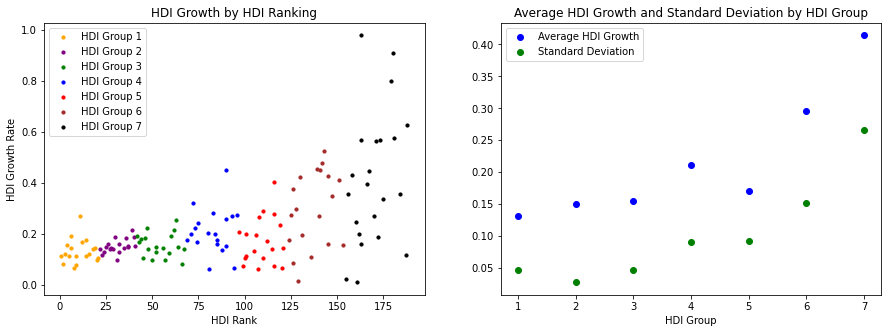

In [15]:
#Plot GDP Growth vs. HDI Growth
ttl1 = "HDI Group 1"
ttl2 = "HDI Group 2"
ttl3 = "HDI Group 3"
ttl4 = "HDI Group 4"
ttl5 = "HDI Group 5"
ttl6 = "HDI Group 6"
ttl7 = "HDI Group 7"

fig = plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.scatter(econ_vs_hdi_1["HDI Rank"],econ_vs_hdi_1["Percent_Change"], color = 'orange',s = 10,label = ttl1)
plt.scatter(econ_vs_hdi_2["HDI Rank"],econ_vs_hdi_2["Percent_Change"], color = 'purple',s = 10, label = ttl2)
plt.scatter(econ_vs_hdi_3["HDI Rank"],econ_vs_hdi_3["Percent_Change"], color = 'green',s = 10,label = ttl3)
plt.scatter(econ_vs_hdi_4["HDI Rank"],econ_vs_hdi_4["Percent_Change"], color = 'blue',s = 10,label = ttl4)
plt.scatter(econ_vs_hdi_5["HDI Rank"],econ_vs_hdi_5["Percent_Change"], color = 'red',s = 10,label = ttl5)
plt.scatter(econ_vs_hdi_6["HDI Rank"],econ_vs_hdi_6["Percent_Change"], color = 'brown',s = 10,label = ttl6)
plt.scatter(econ_vs_hdi_7["HDI Rank"],econ_vs_hdi_7["Percent_Change"], color = 'black',s = 10,label = ttl7)
plt.legend(loc = 'upper left')
plt.xlabel("HDI Rank")
plt.ylabel("HDI Growth Rate")
plt.title("HDI Growth by HDI Ranking")


x_titles = [1,2,3,4,5,6,7]

means_hdi = [econ_vs_hdi_1["Percent_Change"].mean(),
             econ_vs_hdi_2["Percent_Change"].mean(),
             econ_vs_hdi_3["Percent_Change"].mean(),
             econ_vs_hdi_4["Percent_Change"].mean(),
             econ_vs_hdi_5["Percent_Change"].mean(),
             econ_vs_hdi_6["Percent_Change"].mean(),
             econ_vs_hdi_7["Percent_Change"].mean()]

std_hdi = [econ_vs_hdi_1["Percent_Change"].std(),
           econ_vs_hdi_2["Percent_Change"].std(),
           econ_vs_hdi_3["Percent_Change"].std(),
           econ_vs_hdi_4["Percent_Change"].std(),
           econ_vs_hdi_5["Percent_Change"].std(),
           econ_vs_hdi_6["Percent_Change"].std(),
           econ_vs_hdi_7["Percent_Change"].std()]


plt.subplot(1,2,2)
plt.plot(x_titles,means_hdi,'bo',label = "Average HDI Growth")
plt.plot(x_titles, std_hdi, 'go',label = "Standard Deviation")
plt.xlabel("HDI Group")
plt.title("Average HDI Growth and Standard Deviation by HDI Group")
plt.legend(loc = 'upper left')
plt.savefig("figure1.png")




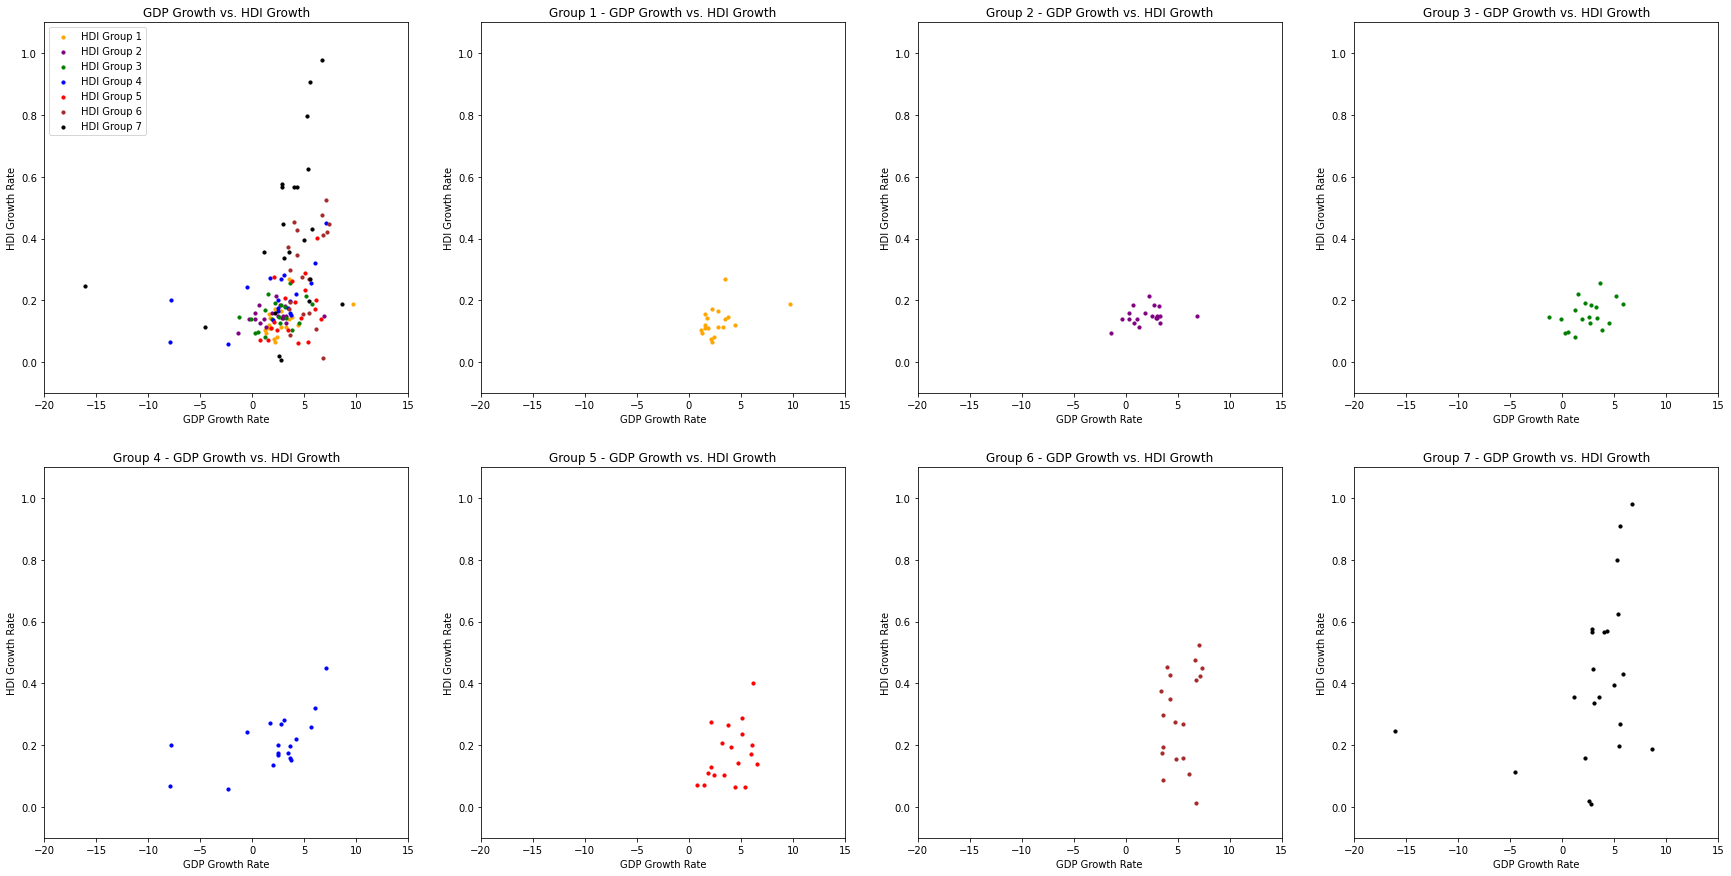

In [16]:

fig = plt.figure(figsize=(30, 15))

gdp_growth_columnn = "5 Year GDP Growth Rate (%)"
hdi_growth_column = "Percent_Change"

plt.subplot(2,4,1)
plt.scatter(econ_vs_hdi_1[gdp_growth_columnn],econ_vs_hdi_1[hdi_growth_column], color = 'orange',s = 10,label = ttl1)
plt.scatter(econ_vs_hdi_2[gdp_growth_columnn],econ_vs_hdi_2[hdi_growth_column], color = 'purple',s = 10, label = ttl2)
plt.scatter(econ_vs_hdi_3[gdp_growth_columnn],econ_vs_hdi_3[hdi_growth_column], color = 'green',s = 10,label = ttl3)
plt.scatter(econ_vs_hdi_4[gdp_growth_columnn],econ_vs_hdi_4[hdi_growth_column], color = 'blue',s = 10,label = ttl4)
plt.scatter(econ_vs_hdi_5[gdp_growth_columnn],econ_vs_hdi_5[hdi_growth_column], color = 'red',s = 10,label = ttl5)
plt.scatter(econ_vs_hdi_6[gdp_growth_columnn],econ_vs_hdi_6[hdi_growth_column], color = 'brown',s = 10,label = ttl6)
plt.scatter(econ_vs_hdi_7[gdp_growth_columnn],econ_vs_hdi_7[hdi_growth_column], color = 'black',s = 10,label = ttl7)
plt.legend(loc = 'upper left')
plt.xlabel("GDP Growth Rate")
plt.ylabel("HDI Growth Rate")
plt.title("GDP Growth vs. HDI Growth")
plt.axis((-20,15,-0.1,1.1))

plt.subplot(2,4,2)
plt.axis((-20,15,-0.1,1.1))
plt.title("Group 1 - GDP Growth vs. HDI Growth")
plt.xlabel("GDP Growth Rate")
plt.ylabel("HDI Growth Rate")
plt.scatter(econ_vs_hdi_1[gdp_growth_columnn],econ_vs_hdi_1[hdi_growth_column], color = 'orange',s = 10,label = ttl1)

plt.subplot(2,4,3)
plt.axis((-20,15,-0.1,1.1))
plt.title("Group 2 - GDP Growth vs. HDI Growth")
plt.xlabel("GDP Growth Rate")
plt.ylabel("HDI Growth Rate")
plt.scatter(econ_vs_hdi_2[gdp_growth_columnn],econ_vs_hdi_2[hdi_growth_column], color = 'purple',s = 10, label = ttl2)

plt.subplot(2,4,4)
plt.axis((-20,15,-0.1,1.1))
plt.title("Group 3 - GDP Growth vs. HDI Growth")
plt.xlabel("GDP Growth Rate")
plt.ylabel("HDI Growth Rate")
plt.scatter(econ_vs_hdi_3[gdp_growth_columnn],econ_vs_hdi_3[hdi_growth_column], color = 'green',s = 10,label = ttl3)

plt.subplot(2,4,5)
plt.axis((-20,15,-0.1,1.1))
plt.title("Group 4 - GDP Growth vs. HDI Growth")
plt.xlabel("GDP Growth Rate")
plt.ylabel("HDI Growth Rate")
plt.scatter(econ_vs_hdi_4[gdp_growth_columnn],econ_vs_hdi_4[hdi_growth_column], color = 'blue',s = 10,label = ttl4)

plt.subplot(2,4,6)
plt.axis((-20,15,-0.1,1.1))
plt.title("Group 5 - GDP Growth vs. HDI Growth")
plt.xlabel("GDP Growth Rate")
plt.ylabel("HDI Growth Rate")
plt.scatter(econ_vs_hdi_5[gdp_growth_columnn],econ_vs_hdi_5[hdi_growth_column], color = 'red',s = 10,label = ttl5)

plt.subplot(2,4,7)
plt.axis((-20,15,-0.1,1.1))
plt.title("Group 6 - GDP Growth vs. HDI Growth")
plt.xlabel("GDP Growth Rate")
plt.ylabel("HDI Growth Rate")
plt.scatter(econ_vs_hdi_6[gdp_growth_columnn],econ_vs_hdi_6[hdi_growth_column], color = 'brown',s = 10,label = ttl6)

plt.subplot(2,4,8)
plt.axis((-20,15,-0.1,1.1))
plt.title("Group 7 - GDP Growth vs. HDI Growth")
plt.xlabel("GDP Growth Rate")
plt.ylabel("HDI Growth Rate")
plt.scatter(econ_vs_hdi_7[gdp_growth_columnn],econ_vs_hdi_7[hdi_growth_column], color = 'black',s = 10,label = ttl7)
plt.savefig("figure2.png")
